In [1]:
# hide
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext lab_black

# Grid Generation

> A basic introduction to Geospatial Grids

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thinkingmachines/geowrangler/blob/master/notebooks/tutorial.grids.ipynb)

In [2]:
# hide
import warnings

from IPython.display import display

warnings.filterwarnings("ignore")

### Import `geopandas` and the `geowrangler.grids` module

In [3]:
import geopandas as gpd

from geowrangler import grids

In [4]:
# hide
!mkdir -p ../data
# download sample geojson file from repo
![ ! -e ../data/region3_admin.geojson ] && curl -s -o ../data/region3_admin.geojson https://raw.githubusercontent.com/thinkingmachines/geowrangler/convert-to-nbdev/data/region3_admin.geojson

### Load a sample geojson file into pandas 


In our case, we are loading the Region 3 (Central Luzon Administrative Region) of the Philippines.

In [5]:
region3_gdf = gpd.read_file("../data/region3_admin.geojson")

This geopandas dataframe has the size: 

In [6]:
# hide_input
print(f"length of region3_gdf: {len(region3_gdf)} row(s)")

length of region3_gdf: 1 row(s)


In [7]:
display(region3_gdf)

,Reg_Code,Reg_Name,Reg_Alt_Name,geometry
0,030000000,Region III,Central Luzon,"MULTIPOLYGON (((120.11687 14.76309, 120.11684 ..."


Show the original plot

<AxesSubplot:>

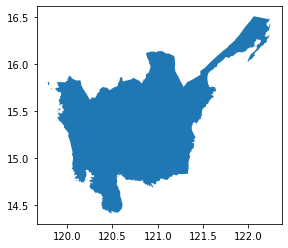

In [8]:
region3_gdf.plot()

In [9]:
region3_gdf.crs  # CRS info

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Creating Grids

Create a grid generator with a size of `5000`. 
The units of the grid size are dependent on the projection of 
the geodataframe, in this case, `EPSG:4326`.

In [10]:
grid_generator5k = grids.GridGenerator(region3_gdf, 5000)  # 5 km x 5 km grids

Generate square grids
> Notice the time taken to grid the multi polygon at 5K resolution


In [11]:
%%time
grid_gdf5k = grid_generator5k.generate_grids()

CPU times: user 26.7 s, sys: 0 ns, total: 26.7 s
Wall time: 26.7 s


Show gridded version of sample geojson file at 5K resolution 

In [12]:
# hide_input
print(f"length of grid_gdf5k: {len(grid_gdf5k)} row(s)")

length of grid_gdf5k: 1074 row(s)


<AxesSubplot:>

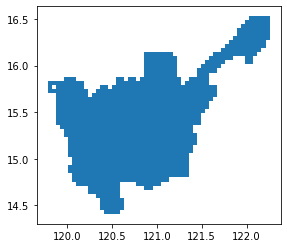

In [13]:
grid_gdf5k.plot()

### Gridding at a coarser resolution
Let's try the same process but with a bigger grid (15K)

In [14]:
grid_generator15k = grids.GridGenerator(region3_gdf, 15000)  # 15 km x 15 km grids

Generate square grids
> Notice the time taken to grid the multi polygon at 15K resolution (compared to 5K resolution)


In [15]:
%%time
grid_gdf15k = grid_generator15k.generate_grids()

CPU times: user 4.23 s, sys: 48.8 ms, total: 4.27 s
Wall time: 4.27 s


Show gridded version of sample geojson file at 15K resolution 

In [16]:
# hide_input
print(f"length of grid_gdf15k: {len(grid_gdf15k)} row(s)")

length of grid_gdf15k: 154 row(s)


<AxesSubplot:>

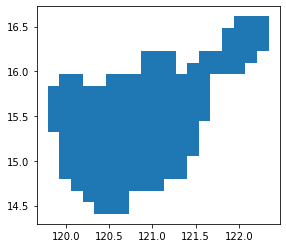

In [17]:
grid_gdf15k.plot()